In [1]:
import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/COA/libcoa/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob
from eofs.xarray import Eof
from myplot import *
import obsinfo as obs
from obsinfo import *



In [2]:
sourceData='/home/msantolaria/Documents/Data/'
sourceData1=sourceData+'noaaV2c/'
sourceData2=sourceData+'noaacdr/'
sourceData3=sourceData+'esacci/'

In [3]:
#! ls /home/msantolaria/Documents/Data/ESACCI/

In [7]:
domain='NHpolar'
season='DJF'
iyr=1967
imon=1
fyr=2018
fmon=12
variable='snc'
unit='%'

In [8]:
model2='noaacdr'
fileName2='nhsce_mon.v01r01_19661004_20250303_1.0x1.0.nc'
#Opening file
data2='noaacdr'
ds2 = xr.open_dataset(sourceData2+fileName2)['snow_cover_extent']
#print(ds2.units)
ds2=100*ds2
field2=dom.field_dom(ds2,domain)
xlon2=field2.lon
ylat2=field2.lat


In [9]:
ds2

<xarray.DataArray 'snow_cover_extent' (time: 702, lat: 180, lon: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1966-10-20 1966-11-17 ... 2025-03-03
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [10]:
#monthList=['mon01','mon02','mon03','mon04','mon05','mon06','mon07','mon08','mon09','mon10','mon11','mon12']
monthList=['DJF','MAM','JJA','SON']


In [11]:
valsLi=[]
anomsLi=[]
for elem in monthList:
    v,a=climb.seasonal_selection(field2,elem,iyr,fyr)
    valsLi.append(v)
    anomsLi.append(a)

(D- 1967  JF- 1968  to D- 2018 JF- 2019


In [12]:
climLi=[];stdLi=[];tLi=[];pLi=[]
for elem in valsLi:
    tmp=elem.mean('time');tmp1=elem.std('time')
    t,i,r,p,s=climb.trend_vect(elem.time,elem,dim='time')#trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
    climLi.append(tmp);stdLi.append(tmp1)
    tLi.append(t);pLi.append(p)

trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


/home/msantolaria/anaconda3/envs/mariaenv/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


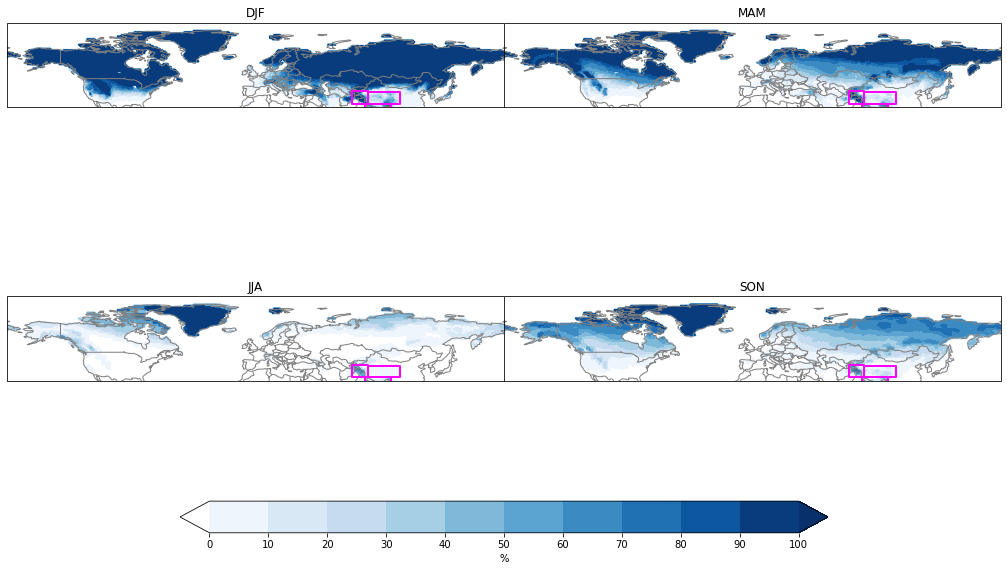

In [13]:
##Spatial trend
cmapN='Blues'
clevs=np.arange(0,110,10)
levs_ticks=clevs


nrows=2
ncols=2
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain('HMA')  
fig,axs= plt.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(15,20))
lonlat_proj = ccrs.PlateCarree()
use_proj = ccrs.PlateCarree()

axs=axs.flatten()
for i in np.arange(0,len(pLi),1):
    lons,lats=np.meshgrid(tLi[i].lon,tLi[i].lat)
    cmap = mpl.cm.get_cmap(cmapN).copy()
    cmap.set_under('w')
    CS1=axs[i].contourf(lons,lats,climLi[i],clevs,
            transform=ccrs.PlateCarree(),cmap=cmap,extend='both')

    axs[i].coastlines(color='grey')
    levels=[0,0.05,1.0]
    axs[i].set_title(monthList[i])
    axs[i].add_feature(cfeature.BORDERS,color='grey', linestyle='-', alpha=1)
    geom,lonX,latY=get_geom('HK')
    axs[i].add_geometries([geom], facecolor='None',edgecolor='fuchsia',crs=ccrs.PlateCarree(), lw=2., alpha=1.0)
    geom,lonX,latY=get_geom('CH')
    axs[i].add_geometries([geom], facecolor='None',edgecolor='fuchsia',crs=ccrs.PlateCarree(), lw=2., alpha=1.0)
    geom,lonX,latY=get_geom('TP')
    axs[i].add_geometries([geom], facecolor='None',edgecolor='fuchsia',crs=ccrs.PlateCarree(), lw=2., alpha=1.0)  

    #axs[i].set_extent([lonW,lonE,latN,latS],ccrs.PlateCarree())
   # gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
   #           lw=1, color="lightgray",linestyle='--')
    #gl.labels_top = False
    #if i in [0]: gl.labels_right = False;gl.labels_left = True
    #elif i in [1]: gl.labels_right = True;gl.labels_left = False
    #elif i in [2]: gl.labels_right = False;gl.labels_left = True
    #elif i in [3]: gl.labels_right = True;gl.labels_left = False
    #gl.set_ylocator=mticker.FixedLocator(np.arange(latS,latN,5),0)
    #gl.set_xlocator = mticker.FixedLocator(np.arange(lonW,lonE,10),0)
    #gl.set_xformatter = LongitudeFormatter;gl.set_yformatter = LatitudeFormatter
    #gl.set_xlabel_style = {'color': 'black'};gl.set_xlabel_style = {'color': 'black'}   
    fig.subplots_adjust(bottom=0.36, top=0.74, left=0.04, right=0.96,
                wspace=0.000001, hspace=0.0001)
cbar_ax = fig.add_axes([0.2, 0.32, 0.6, 0.022])
cbar=fig.colorbar(CS1, cax=cbar_ax,ticks=levs_ticks,orientation='horizontal',label='%')

#plotname='clim_'+variableY+'.'+dataY+'_'+resY+'_'+domainY+'_seasonal_'+str(iyr)+'_'+str(fyr)
#plt.suptitle(plotname,y=0.78)
#plt.savefig(plotsDir+plotname+'.png',format='png',bbox_inches='tight')
plt.show()

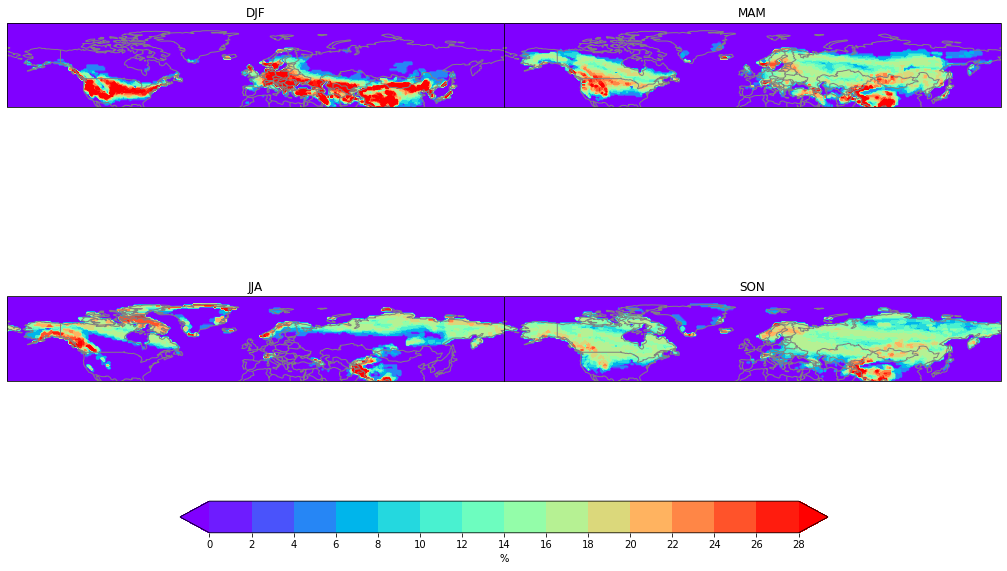

In [14]:
##Spatial trend
clevs=np.arange(0,30,2)
levs_ticks=clevs
cmapN='rainbow'

nrows=2
ncols=2
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain('HMA')  
fig,axs= plt.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(15,20))
lonlat_proj = ccrs.PlateCarree()
use_proj = ccrs.PlateCarree()

axs=axs.flatten()
for i in np.arange(0,len(pLi),1):
    lons,lats=np.meshgrid(tLi[i].lon,tLi[i].lat)
    cmap = mpl.cm.get_cmap(cmapN).copy()
    cmap.set_under('w')
    CS1=axs[i].contourf(lons,lats,stdLi[i],clevs,
            transform=ccrs.PlateCarree(),cmap=cmapN,extend='both')
    axs[i].coastlines(color='grey')
    levels=[0,0.05,1.0]
    axs[i].set_title(monthList[i])
    axs[i].add_feature(cfeature.BORDERS,color='grey', linestyle='-', alpha=1)
    #axs[i].set_extent([lonW,lonE,latN,latS],ccrs.PlateCarree())
   # gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
   #           lw=1, color="lightgray",linestyle='--')
    #gl.labels_top = False
    #if i in [0]: gl.labels_right = False;gl.labels_left = True
    #elif i in [1]: gl.labels_right = True;gl.labels_left = False
    #elif i in [2]: gl.labels_right = False;gl.labels_left = True
    #elif i in [3]: gl.labels_right = True;gl.labels_left = False
    #gl.set_ylocator=mticker.FixedLocator(np.arange(latS,latN,5),0)
    #gl.set_xlocator = mticker.FixedLocator(np.arange(lonW,lonE,10),0)
    #gl.set_xformatter = LongitudeFormatter;gl.set_yformatter = LatitudeFormatter
    #gl.set_xlabel_style = {'color': 'black'};gl.set_xlabel_style = {'color': 'black'}   
    fig.subplots_adjust(bottom=0.36, top=0.74, left=0.04, right=0.96,
                wspace=0.000001, hspace=0.0001)
cbar_ax = fig.add_axes([0.2, 0.32, 0.6, 0.022])
cbar=fig.colorbar(CS1, cax=cbar_ax,ticks=levs_ticks,orientation='horizontal',label='%')

#plotname='std_'+variableY+'.'+dataY+'_'+resY+'_'+domainY+'_seasonal_'+str(iyr)+'_'+str(fyr)
#plt.suptitle(plotname,y=0.78)
#plt.savefig(plotsDir+plotname+'.png',format='png',bbox_inches='tight')
plt.show()

/home/msantolaria/anaconda3/envs/mariaenv/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/msantolaria/anaconda3/envs/mariaenv/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/msantolaria/anaconda3/envs/mariaenv/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/msantolaria/anaconda3/envs/mariaenv/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/msantolaria/anaconda3/envs/mariaenv/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/msantolaria/anaconda3/envs/mariaenv/lib/python3.9/site-packages/matpl

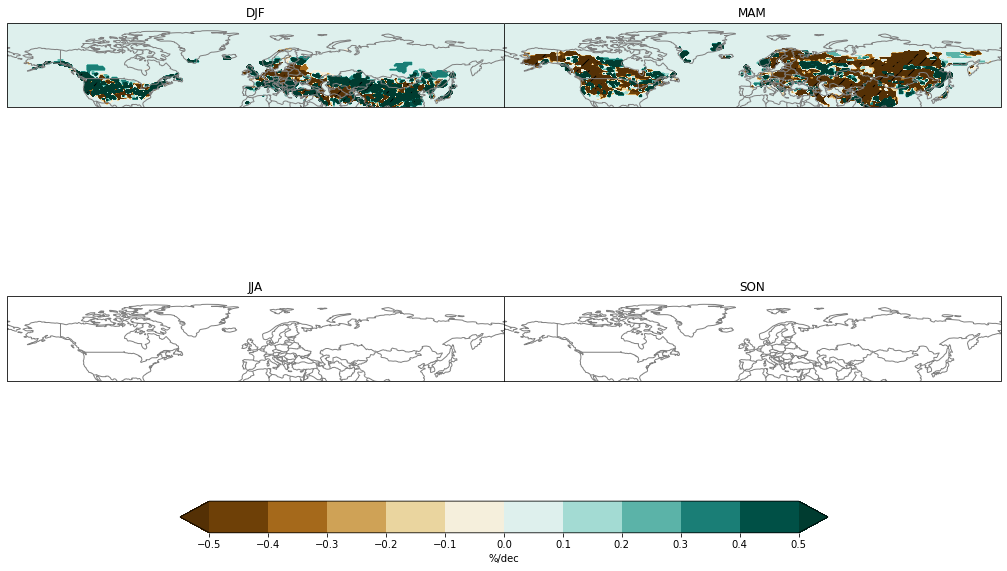

In [15]:
##Spatial trend
clevs=np.arange(-0.5,0.6,0.1)
cmap='BrBG'
levs_ticks=clevs
#import matplotlib.colors as mcolors
#offset = mcolors.TwoSlopeNorm(vmin=-11.,vcenter=0., vmax=11)
nrows=2
ncols=2
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain('HMA')  
fig,axs= plt.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(15,20))
lonlat_proj = ccrs.PlateCarree()
use_proj = ccrs.PlateCarree()

axs=axs.flatten()
for i in np.arange(0,len(pLi),1):
    lons,lats=np.meshgrid(tLi[i].lon,tLi[i].lat)
    CS1=axs[i].contourf(lons,lats,10*tLi[i],clevs,
            transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
    axs[i].coastlines(color='grey')
    levels=[0,0.05,1.0]
    cs = axs[i].contourf(lons,lats,abs(pLi[i]), transform=ccrs.PlateCarree(),levels=levels,
            hatches=["//", ""], alpha=0.)
    axs[i].set_title(monthList[i])
    axs[i].add_feature(cfeature.BORDERS,color='grey', linestyle='-', alpha=1)
    #axs[i].set_extent([lonW,lonE,latN,latS],ccrs.PlateCarree())
   # gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
   #           lw=1, color="lightgray",linestyle='--')
    #gl.labels_top = False
    #if i in [0]: gl.labels_right = False;gl.labels_left = True
    #elif i in [1]: gl.labels_right = True;gl.labels_left = False
    #elif i in [2]: gl.labels_right = False;gl.labels_left = True
    #elif i in [3]: gl.labels_right = True;gl.labels_left = False
    #gl.set_ylocator=mticker.FixedLocator(np.arange(latS,latN,5),0)
    #gl.set_xlocator = mticker.FixedLocator(np.arange(lonW,lonE,10),0)
    #gl.set_xformatter = LongitudeFormatter;gl.set_yformatter = LatitudeFormatter
    #gl.set_xlabel_style = {'color': 'black'};gl.set_xlabel_style = {'color': 'black'}   
    fig.subplots_adjust(bottom=0.36, top=0.74, left=0.04, right=0.96,
                wspace=0.000001, hspace=0.0001)
cbar_ax = fig.add_axes([0.2, 0.32, 0.6, 0.022])
cbar=fig.colorbar(CS1, cax=cbar_ax,ticks=levs_ticks,orientation='horizontal',label='%/dec')

#plotname='spatialtrend_'+variableY+'.'+dataY+'_'+resY+'_'+domainY+'_seasonal_'+str(iyr)+'_'+str(fyr)
#plt.suptitle(plotname,y=0.78)
#plt.savefig(plotsDir+plotname+'.png',format='png',bbox_inches='tight')
plt.show()

In [16]:
anoms3=anomsLi[2]
vals3=valsLi[2]
coords2D={anoms3.dims[1]: anoms3.coords[anoms3.dims[1]],anoms3.dims[2]: anoms3.coords[anoms3.dims[2]]}
zero2D= xr.DataArray(np.zeros((anoms3.shape[1],anoms3.shape[2])),coords=coords2D,dims=[anoms3.dims[1],anoms3.dims[2]])

trend3=xr.zeros_like(zero2D)
intercept3=xr.zeros_like(zero2D)
rvalue3=xr.zeros_like(zero2D)
pvalue3=xr.zeros_like(zero2D)
stderr3=xr.zeros_like(zero2D)

par3=[]
for j in range(anoms3.shape[1]):
    for i in range(anoms3.shape[2]):
        if np.isnan(anoms3[:,j,i].values).all()==True:
            trend3[j,i]=np.nan
            intercept3[j,i]=np.nan
            rvalue3[j,i]=np.nan
            pvalue3[j,i]=np.nan
            stderr3[j,i]=np.nan
        else:
            Y=anoms3[:,j,i]    
            #print(anoms[:,j,i])
            Y2=Y[np.logical_not(np.isnan(Y.values))]
            X=np.arange(0,len(vals3[:,j,i]),1)
            X2=X[np.logical_not(np.isnan(Y.values))]
            par=stats.linregress(X2,Y2)
            trend3[j,i]=par[0]
            intercept3[j,i]=par[1]
            rvalue3[j,i]=par[2]
            pvalue3[j,i]=par[3]
            stderr3[j,i]=par[4]
par3=[trend3,intercept3,rvalue3,pvalue3,stderr3]
print('0-trend','1-intercept','2-rvalue','3-pvalue','4-stderr')

0-trend 1-intercept 2-rvalue 3-pvalue 4-stderr


In [17]:
anoms4=anomsLi[3]
vals4=valsLi[3]

coords2D={anoms3.dims[1]: anoms3.coords[anoms3.dims[1]],anoms3.dims[2]: anoms3.coords[anoms3.dims[2]]}
zero2D= xr.DataArray(np.zeros((anoms3.shape[1],anoms3.shape[2])),coords=coords2D,dims=[anoms3.dims[1],anoms3.dims[2]])

trend4=xr.zeros_like(zero2D)
intercept4=xr.zeros_like(zero2D)
rvalue4=xr.zeros_like(zero2D)
pvalue4=xr.zeros_like(zero2D)
stderr4=xr.zeros_like(zero2D)

par4=[]
for j in range(anoms4.shape[1]):
    for i in range(anoms4.shape[2]):
        if np.isnan(anoms4[:,j,i].values).all()==True:
            trend4[j,i]=np.nan
            intercept4[j,i]=np.nan
            rvalue4[j,i]=np.nan
            pvalue4[j,i]=np.nan
            stderr4[j,i]=np.nan
        else:
            Y=anoms4[:,j,i]    
            #print(anoms[:,j,i])
            Y2=Y[np.logical_not(np.isnan(Y.values))]
            X=np.arange(0,len(vals3[:,j,i]),1)
            X2=X[np.logical_not(np.isnan(Y.values))]
            par=stats.linregress(X2,Y2)
            trend4[j,i]=par[0]
            intercept4[j,i]=par[1]
            rvalue4[j,i]=par[2]
            pvalue4[j,i]=par[3]
            stderr4[j,i]=par[4]
par4=[trend4,intercept4,rvalue4,pvalue4,stderr4]
print('0-trend','1-intercept','2-rvalue','3-pvalue','4-stderr')

0-trend 1-intercept 2-rvalue 3-pvalue 4-stderr


In [18]:
t2Li=[tLi[0],tLi[1],par3[0],par4[0]]
p2Li=[pLi[0],pLi[1],par3[3],par4[3]]

/home/msantolaria/anaconda3/envs/mariaenv/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


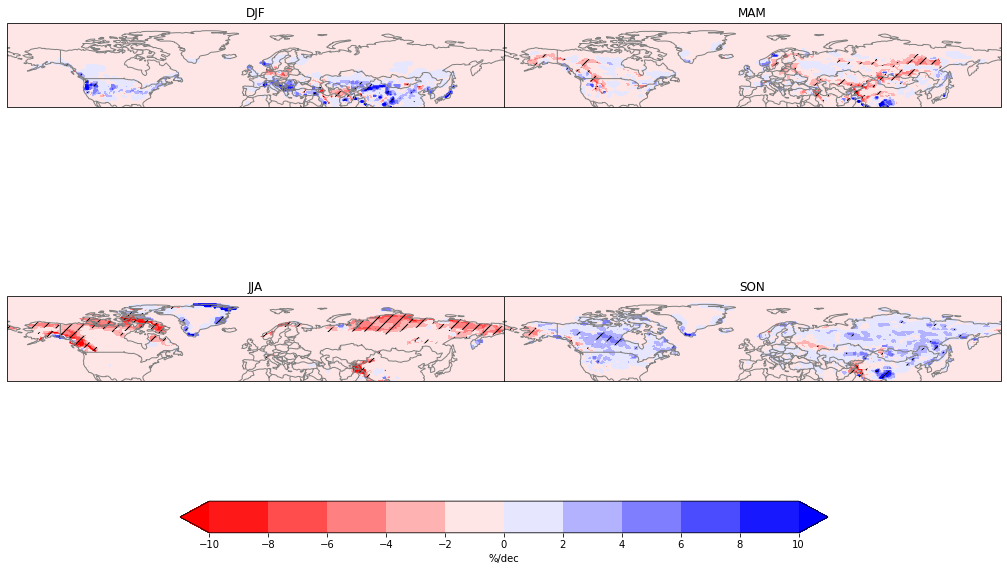

In [19]:
##Spatial trend
clevs=np.arange(-10,12,2)
cmap='bwr_r'
levs_ticks=clevs
#import matplotlib.colors as mcolors
#offset = mcolors.TwoSlopeNorm(vmin=-11.,vcenter=0., vmax=11)
nrows=2
ncols=2
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain('HMA')  
fig,axs= plt.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(15,20))
lonlat_proj = ccrs.PlateCarree()
use_proj = ccrs.PlateCarree()

axs=axs.flatten()
for i in np.arange(0,len(p2Li),1):
    lons,lats=np.meshgrid(t2Li[i].lon,t2Li[i].lat)
    CS1=axs[i].contourf(lons,lats,10*t2Li[i],clevs,
            transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
    axs[i].coastlines(color='grey')
    levels=[0,0.05,1.0]
    cs = axs[i].contourf(lons,lats,abs(p2Li[i]), transform=ccrs.PlateCarree(),levels=levels,
            hatches=["//", ""], alpha=0.)
    axs[i].set_title(monthList[i])
    axs[i].add_feature(cfeature.BORDERS,color='grey', linestyle='-', alpha=1)
    #axs[i].set_extent([lonW,lonE,latN,latS],ccrs.PlateCarree())
   # gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
   #           lw=1, color="lightgray",linestyle='--')
    #gl.labels_top = False
    #if i in [0]: gl.labels_right = False;gl.labels_left = True
    #elif i in [1]: gl.labels_right = True;gl.labels_left = False
    #elif i in [2]: gl.labels_right = False;gl.labels_left = True
    #elif i in [3]: gl.labels_right = True;gl.labels_left = False
    #gl.set_ylocator=mticker.FixedLocator(np.arange(latS,latN,5),0)
    #gl.set_xlocator = mticker.FixedLocator(np.arange(lonW,lonE,10),0)
    #gl.set_xformatter = LongitudeFormatter;gl.set_yformatter = LatitudeFormatter
    #gl.set_xlabel_style = {'color': 'black'};gl.set_xlabel_style = {'color': 'black'}   
    fig.subplots_adjust(bottom=0.36, top=0.74, left=0.04, right=0.96,
                wspace=0.000001, hspace=0.0001)
cbar_ax = fig.add_axes([0.2, 0.32, 0.6, 0.022])
cbar=fig.colorbar(CS1, cax=cbar_ax,ticks=levs_ticks,orientation='horizontal',label='%/dec')

#plotname='spatialtrend_'+variableY+'.'+dataY+'_'+resY+'_'+domainY+'_seasonal_'+str(iyr)+'_'+str(fyr)
#plt.suptitle(plotname,y=0.78)
#plt.savefig(plotsDir+plotname+'.png',format='png',bbox_inches='tight')
plt.show()

In [20]:
ttt=climb.spatial_regression_nans(vals4)

ValueError: Inputs must not be empty.

In [ ]:
anoms4=anomsLi[3]
vals4=valsLi[3]

def trend_vect_nans(seasonal_values):
    coords2D={seasonal_values.dims[1]: seasonal_values.coords[anoms3.dims[1]],
              seasonal_values.dims[2]: seasonal_values.coords[anoms3.dims[2]]}
    zero2D= xr.DataArray(np.zeros((seasonal_values.shape[1],seasonal_values.shape[2])),
                         coords=coords2D,dims=[seasonal_values.dims[1],seasonal_values.dims[2]])

    trend=xr.zeros_like(zero2D)
    intercept=xr.zeros_like(zero2D)
    rvalue=xr.zeros_like(zero2D)
    pvalue=xr.zeros_like(zero2D)
    stderr=xr.zeros_like(zero2D)

    par=[]
    for j in range(seasonal_values.shape[1]):
        for i in range(seasonal_values.shape[2]):
            if np.isnan(seasonal_values[:,j,i].values).all()==True:
                trend[j,i]=np.nan
                intercept[j,i]=np.nan
                rvalue[j,i]=np.nan
                pvalue[j,i]=np.nan
                stderr[j,i]=np.nan
            else:
                Y=seasonal_values[:,j,i]    
            #print(anoms[:,j,i])
                Y2=Y[np.logical_not(np.isnan(Y.values))]
                X=np.arange(0,len(vals3[:,j,i]),1)
                X2=X[np.logical_not(np.isnan(Y.values))]
                par=stats.linregress(X2,Y2)
                trend[j,i]=par[0]
                intercept[j,i]=par[1]
                rvalue[j,i]=par[2]
                pvalue[j,i]=par[3]
                stderr[j,i]=par[4]
    par=[trend,intercept,rvalue,pvalue,stderr]
    return par
    print('0-trend','1-intercept','2-rvalue','3-pvalue','4-stderr')

In [ ]:
par=trend_vect_nans(anomsLi[3])

In [ ]:
par[0].plot()